# Term subscription prediction
 The main goal is to solve a classification problem which is prediction weather a person will be subscribed to a term contract  or not.  This part is EDA for the bank additional dataset that can downloaded following [Bank Marketing Dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing)

In [2]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) 
plt.rcParams['font.size'] = 12


In [6]:
### --- 1: Load the data ---

try:
    df = pd.read_csv("../data/bank-additional-full.csv", sep=';')
    print("Dataset loaded successfully")
    print(f"Dataset shape: {df.shape}")
    print(f"\nFirst 5 rows:")
    display(df.head())
except FileNotFoundError:
    print("Error: dataset not found. Ensure that the data is downloaded and in the right path")
    df = None
    

Dataset loaded successfully
Dataset shape: (41188, 21)

First 5 rows:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



-- Dataset Information --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000



- Value Counts for Categorical Features (Top 10) --

Columns: job


job
admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
Name: proportion, dtype: float64


Columns: marital


marital
married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: proportion, dtype: float64


Columns: education


education
university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: proportion, dtype: float64


Columns: default


default
no         0.791201
unknown    0.208726
yes        0.000073
Name: proportion, dtype: float64


Columns: housing


housing
yes        0.523842
no         0.452122
unknown    0.024036
Name: proportion, dtype: float64


Columns: loan


loan
no         0.824269
yes        0.151695
unknown    0.024036
Name: proportion, dtype: float64


Columns: contact


contact
cellular     0.634748
telephone    0.365252
Name: proportion, dtype: float64


Columns: month


month
may    0.334296
jul    0.174177
aug    0.149995
jun    0.129115
nov    0.099568
apr    0.063902
oct    0.017432
sep    0.013839
mar    0.013256
dec    0.004419
Name: proportion, dtype: float64


Columns: day_of_week


day_of_week
thu    0.209357
mon    0.206711
wed    0.197485
tue    0.196416
fri    0.190031
Name: proportion, dtype: float64


Columns: poutcome


poutcome
nonexistent    0.863431
failure        0.103234
success        0.033335
Name: proportion, dtype: float64


Columns: y


y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


-- Check if there is non values --


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


-- Check if there is unknown --


['job', 'marital', 'education', 'default', 'housing', 'loan']


-- Target Variable Distribution ('y')
y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


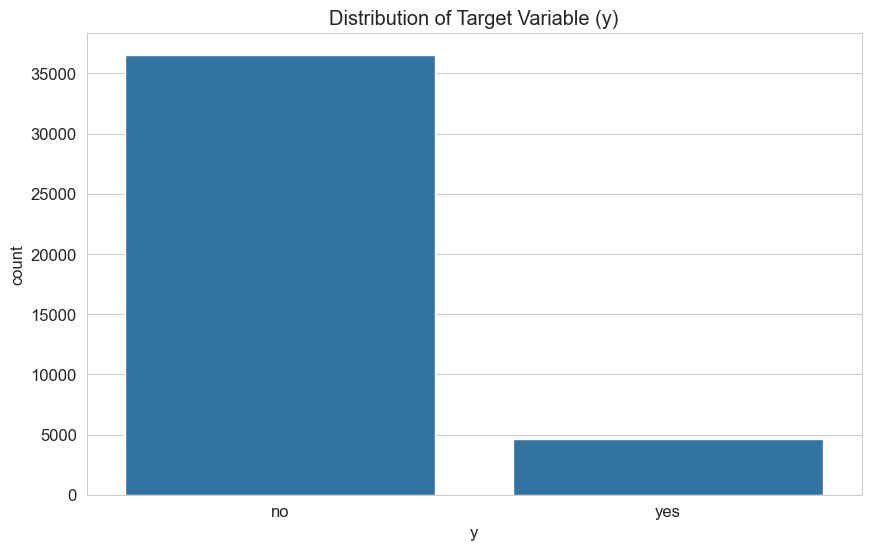

In [11]:
### -- 2. Data Overview

if df is not None:
    print("\n-- Dataset Information --")
    df.info()


    print("\n-- Descriptive Statistics for Numerical Features --")
    display(df.describe())
    
    print("\n- Value Counts for Categorical Features (Top 10) --")
    categorical_cols = df.select_dtypes(include='object').columns
    for col in categorical_cols:
        print(f"\nColumns: {col}")
        display(df[col].value_counts(normalize=True).head(10))
    
    print("\n-- Check if there is non values --")
    display(df.isna().sum())
    print("\n-- Check if there is unknown --")
    display(df.columns[(df == 'unknown').any()].tolist())
    
    print("\n-- Target Variable Distribution ('y')")
    print(df['y'].value_counts(normalize=True))
    sns.countplot(x='y', data=df)
    plt.title("Distribution of Target Variable (y)")
    plt.show()

In [12]:
# -- Data cleaning and Handling Inconsistencies --

if df is not None:
    print("\n-- Cleaning 'unknown' values and inconsistencies -- ")
    # the dataset use unknown to denote missing values
    for col in categorical_cols:
        if 'unknown' in df[col].unique():
            unknown_count = df[col].value_counts()['unknown']
            print(f"Columns {col} has {unknown_count} 'unknown values ({unknown_count / len(df) * 100:.2f}%)")


-- Cleaning 'unknown' values and inconsistencies -- 
Columns job has 330 'unknown values (0.80%)
Columns marital has 80 'unknown values (0.19%)
Columns education has 1731 'unknown values (4.20%)
Columns default has 8597 'unknown values (20.87%)
Columns housing has 990 'unknown values (2.40%)
Columns loan has 990 'unknown values (2.40%)


- As 'Unknown' is is various columns with small percentage except for default. We will treat 'unknown' as a category for now


#### 4. Feature Engineering Insights / Problematic Features


-- Analyzing 'duration' features which count for the last contact (call duration) with the bank in sec
count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


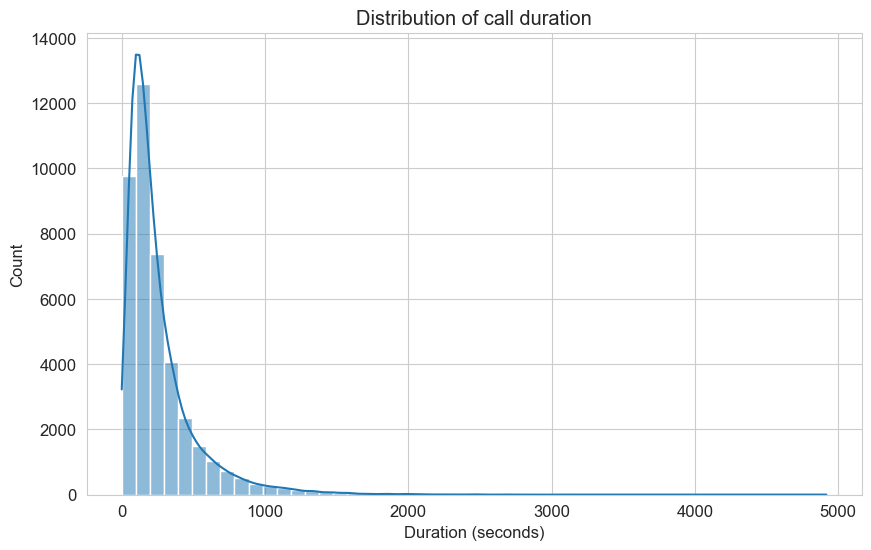

In [ ]:


print("\n-- Analyzing 'duration' features which count for the last contact (call duration) with the bank in sec")
print(df['duration'].describe())
sns.histplot(df['duration'], bins=50, kde=True)
plt.title("Distribution of call duration")
plt.xlabel("Duration (seconds)")
plt.show()

- From data description, 'duration' data is highly predictive but problematic. As it highly affects the target, if 0 then y=0.
- Also the duration is not known before a call is preformed, Also after the end of the call the 'y' is obviously known. Thus, this input should be removed if the intention is to have a realistic model


 -- Impact of 'duration' on target variable --
y
no     220.844807
yes    553.191164
Name: duration, dtype: float64


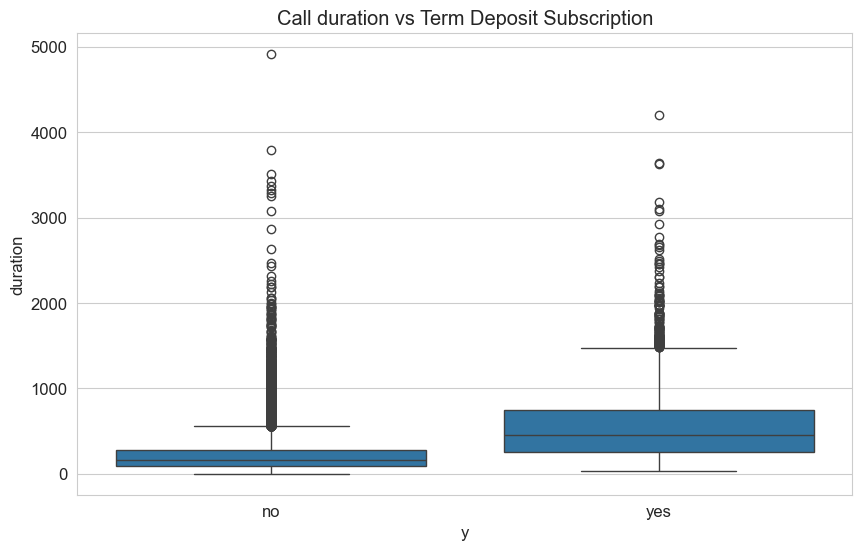


 -- Impact of 'duration' on target variable --
y
no     220.844807
yes    553.191164
Name: duration, dtype: float64


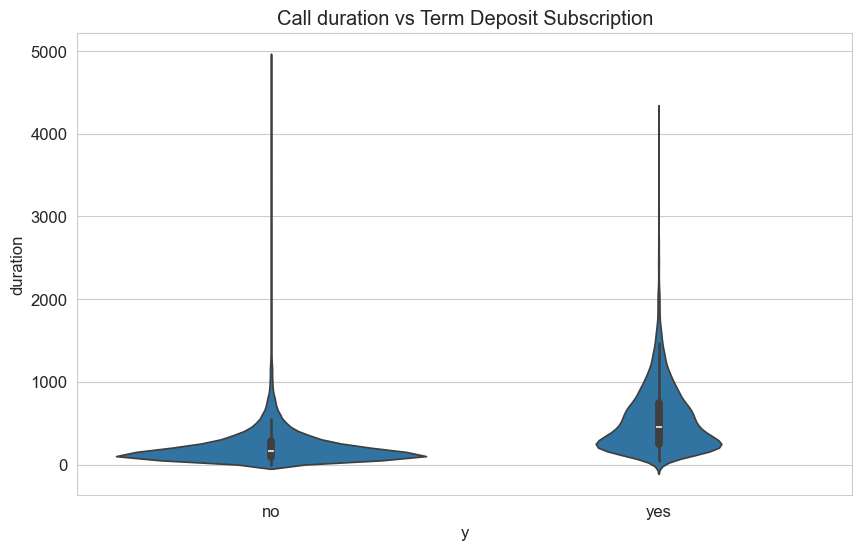


 -- Impact of 'Age' on target variable --
y
no     39.911185
yes    40.913147
Name: age, dtype: float64


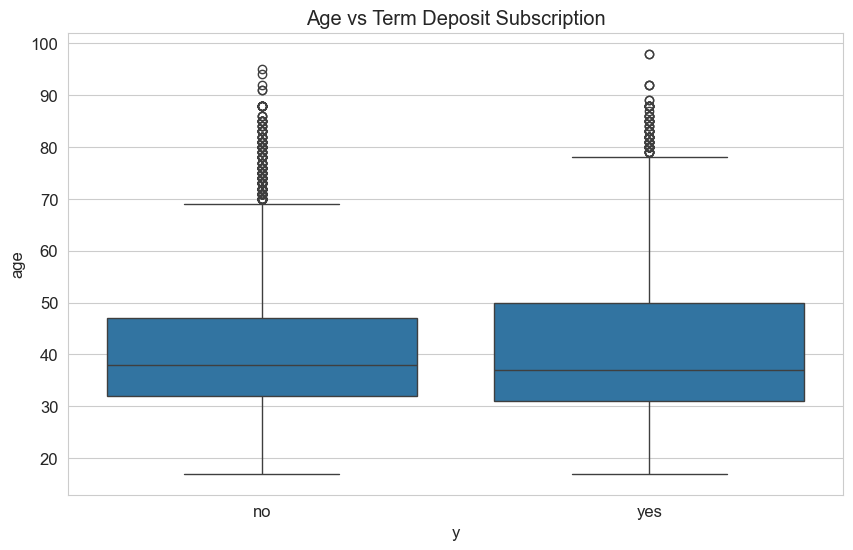


 -- Impact of 'Age' on target variable --
y
no     39.911185
yes    40.913147
Name: age, dtype: float64


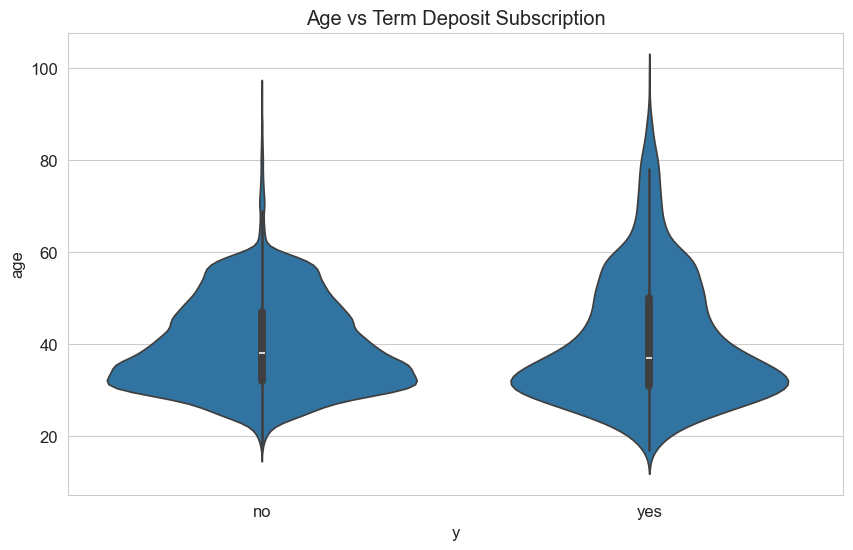

In [24]:
print("\n -- Impact of 'duration' on target variable --")
print(df.groupby('y')['duration'].mean())
sns.boxplot(x='y', y='duration', data=df)
plt.title("Call duration vs Term Deposit Subscription")
plt.show()

print("\n -- Impact of 'duration' on target variable --")
print(df.groupby('y')['duration'].mean())
sns.violinplot(x='y', y='duration', data=df)
plt.title("Call duration vs Term Deposit Subscription")
plt.show()


print("\n -- Impact of 'Age' on target variable --")
print(df.groupby('y')['age'].mean())
sns.boxplot(x='y', y='age', data=df)
plt.title("Age vs Term Deposit Subscription")
plt.show()

print("\n -- Impact of 'Age' on target variable --")
print(df.groupby('y')['age'].mean())
sns.violinplot(x='y', y='age', data=df)
plt.title("Age vs Term Deposit Subscription")
plt.show()

- As we can see know 'duration' is very correlated with the prediction. So we must drop it and not include it in the training

In [55]:
## Drop duration
df = df.drop(columns={'duration'})

####  5. Handling Outliers

In [56]:
## Applying the IQR rule to detect outliers for other columns

def number_outlier(df ,cols: str):
    
    """
        Function to count outliers in a given col
        Args:
            df: DataFrame
            cols: The column
        Return:
            The number of outliers
    """
    
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -  1.5 * IQR
    upper_bound  = Q3 + 1.5 * IQR
    
    lower = df.loc[df[cols] < lower_bound].shape[0]
    upper = df.loc[df[cols] > upper_bound].shape[0]
    
    return lower + upper
    


-- Outlier Check for 'age' 

-- Number of outliers --, 469


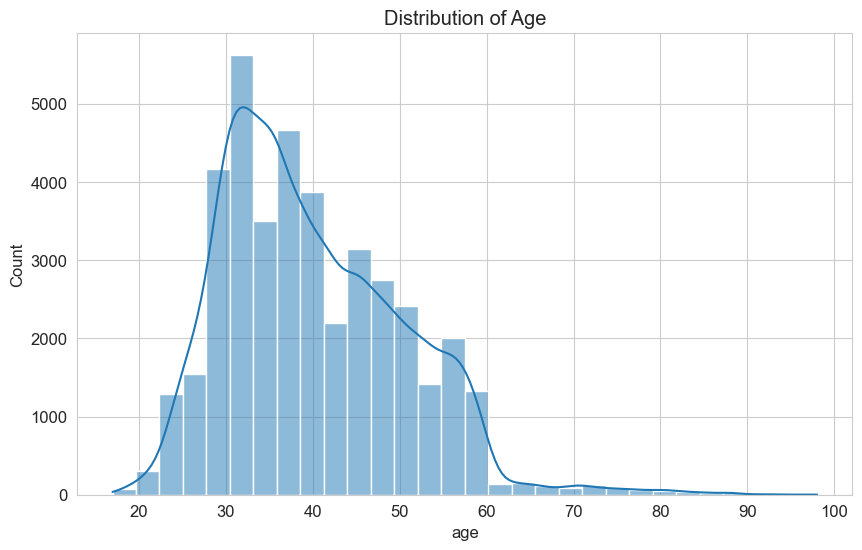

In [57]:
print("\n-- Outlier Check for 'age' ")
print(f"\n-- Number of outliers --, {number_outlier(df, 'age')}")
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.show()

- Looks from both the dist plot and also Age boxplot that there isn't much outliers


-- Outlier Check for 'campaign' 

-- Number of outliers --, 2406, 5.84%


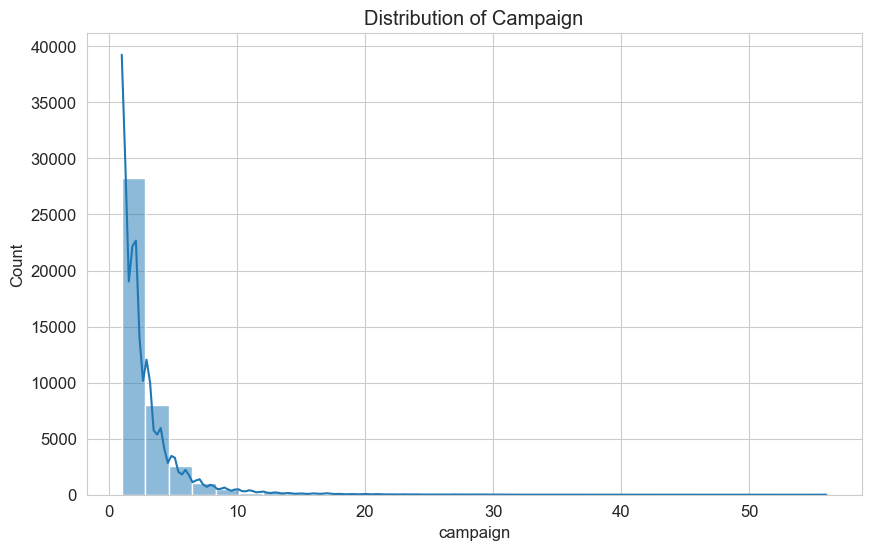

In [58]:
print("\n-- Outlier Check for 'campaign' ")
print(f"\n-- Number of outliers --, {number_outlier(df, 'campaign')}, {number_outlier(df, 'campaign')/len(df) * 100:.2f}%")
sns.histplot(df['campaign'], bins=30, kde=True)
plt.title("Distribution of Campaign")
plt.show()


-- Outlier Check for 'pdays ' 

-- Number of outliers --, 1515, 3.68%


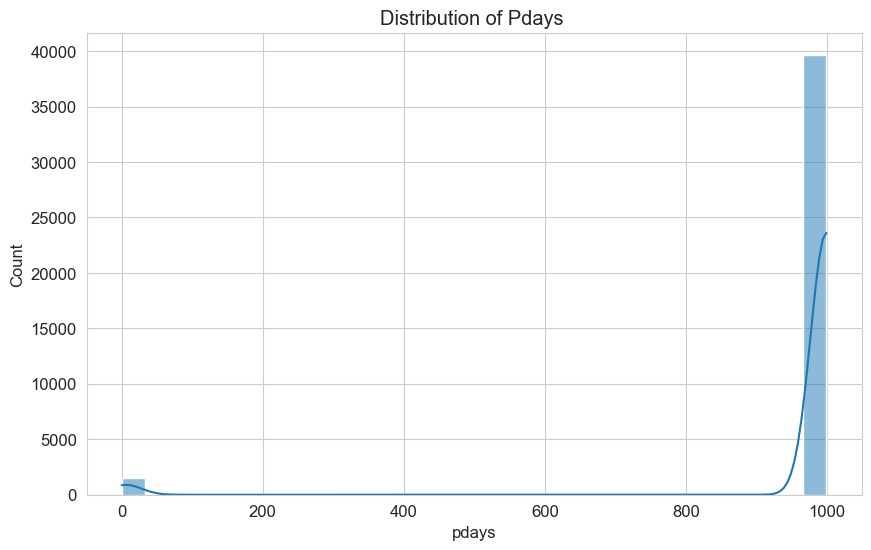

In [59]:
print("\n-- Outlier Check for 'pdays ' ")
print(f"\n-- Number of outliers --, {number_outlier(df, 'pdays')}, {number_outlier(df, 'pdays')/len(df) * 100 :.2f}%")
sns.histplot(df['pdays'], bins=30, kde=True)
plt.title("Distribution of Pdays ")
plt.show()

In [60]:
print("\n--- Checking 'pdays' (days since last contact) ---")
print(df['pdays'].value_counts(normalize=True).head())


--- Checking 'pdays' (days since last contact) ---
pdays
999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
Name: proportion, dtype: float64



-- Outlier Check for 'previous ' 

-- Number of outliers --, 5625, 13.66%


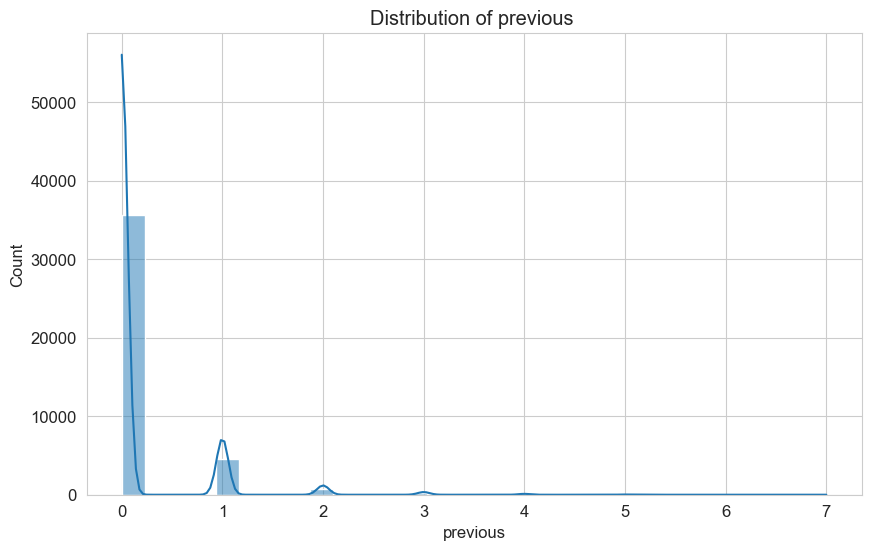

In [61]:
print("\n-- Outlier Check for 'previous ' ")
print(f"\n-- Number of outliers --, { number_outlier(df, 'previous')}, {number_outlier(df, 'previous')/len(df) * 100:.2f}%")
sns.histplot(df['previous'], bins=30, kde=True)
plt.title("Distribution of previous ")
plt.show()

- Looks from both the dist plot and also Age boxplot that there isn't much outliers
- None of the features have really a bigger amount of outliers, we will just scale them through standrdization

#### 6. Reviewing Data Types and Preparing for preprocessing

In [62]:
print("\n -- Final Data Types Check --")
print(df.dtypes)


 -- Final Data Types Check --
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [63]:
print("\n--- EDA and Cleaning Insights Summary ---")
print("1. Data loaded successfully with 41188 rows and 21 columns.")
print("2. Target variable 'y' is highly imbalanced (approx. 88.7% 'no', 11.3% 'yes'). This will require handling (e.g., oversampling, undersampling, class weights).")
print("3. Categorical features contain 'unknown' values. These will be treated as separate categories during encoding.")
print("4. The 'duration' column is a data leakage issue and MUST be dropped for a realistic predictive model.")
print("5. 'pdays' has a special value 999 indicating 'not previously contacted'. This needs special handling (e.g., binary indicator for 999, then scale remaining values).")
print("6. All numerical features need scaling. Categorical features need encoding.")
print("\nInitial data exploration and cleaning complete. These insights will inform the data preprocessing pipeline.")




--- EDA and Cleaning Insights Summary ---
1. Data loaded successfully with 41188 rows and 21 columns.
2. Target variable 'y' is highly imbalanced (approx. 88.7% 'no', 11.3% 'yes'). This will require handling (e.g., oversampling, undersampling, class weights).
3. Categorical features contain 'unknown' values. These will be treated as separate categories during encoding.
4. The 'duration' column is a data leakage issue and MUST be dropped for a realistic predictive model.
5. 'pdays' has a special value 999 indicating 'not previously contacted'. This needs special handling (e.g., binary indicator for 999, then scale remaining values).
6. All numerical features need scaling. Categorical features need encoding.

Initial data exploration and cleaning complete. These insights will inform the data preprocessing pipeline.
